# Objective 

Using unsupervised machine learning techniques to determine the anomalous timeseries in a multi time series dataset.

# Data creation 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate multivariate time series data (10 series, each with 100 time points and 3 variables A, B, and C)
time_points = 100
num_series = 10
num_features = 3
time_series_data = np.random.randn(time_points, num_series, num_features)

# Introduce a sudden deviation in one of the time series
anomalous_series_index = 3
anomalous_point = 70
time_series_data[anomalous_point:, anomalous_series_index, :] += 10


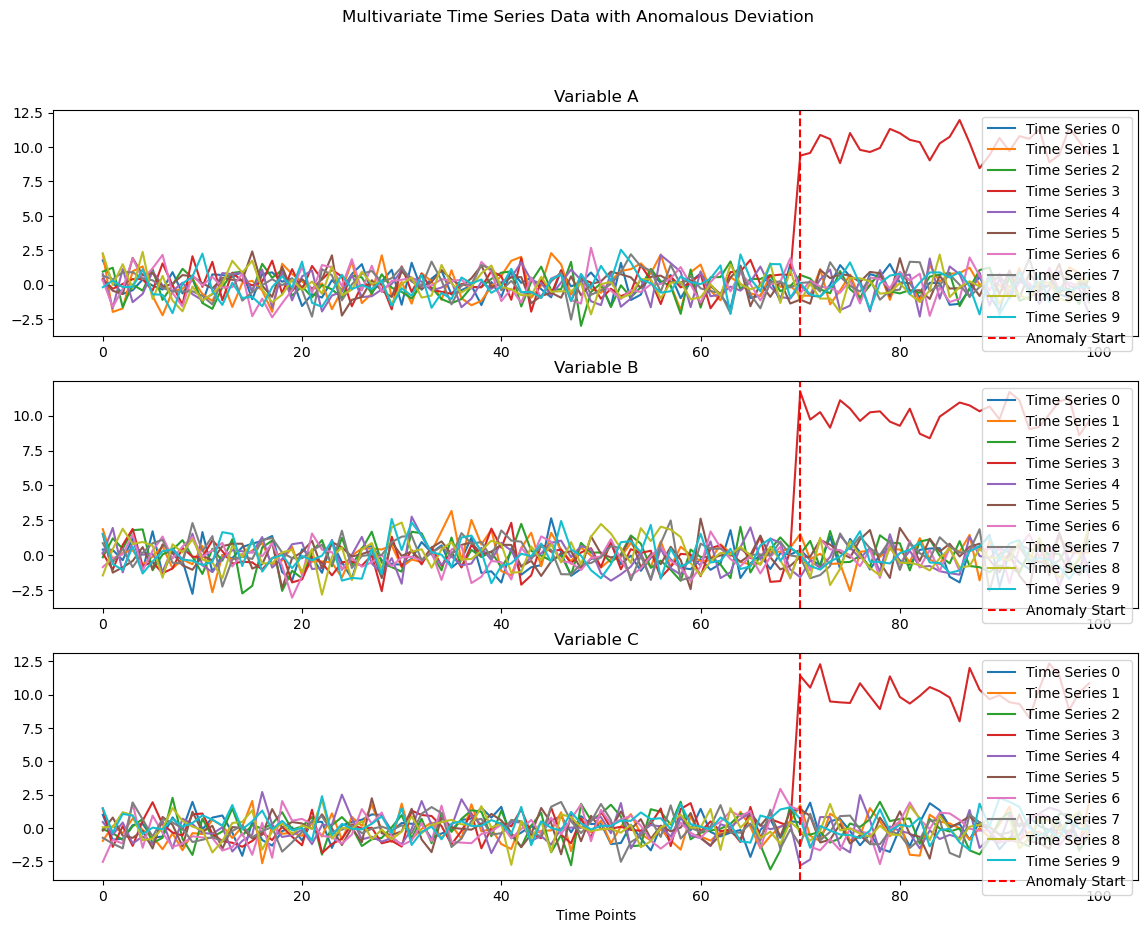

Anomalous time series indices: 3


In [2]:
# Plot the time series data
fig, axs = plt.subplots(num_features, 1, figsize=(14, 10))
labels = ['A', 'B', 'C']

for j in range(num_features):
    for i in range(num_series):
        axs[j].plot(time_series_data[:, i, j], label=f'Time Series {i}')
    axs[j].axvline(x=anomalous_point, color='red', linestyle='--', label='Anomaly Start')
    axs[j].set_title(f'Variable {labels[j]}')
    axs[j].legend()

plt.suptitle('Multivariate Time Series Data with Anomalous Deviation')
plt.xlabel('Time Points')
plt.show()

print(f"Anomalous time series indices: {anomalous_series_index}")

In [3]:

# Create a pandas DataFrame
# Reshape to (time_points, num_series * num_features)
reshaped_data = time_series_data.reshape(time_points, num_series * num_features)

# Create column names
columns = []
for i in range(num_series):
    for j in labels:
        columns.append(f'Series_{i}_Feature_{j}')

# Create the DataFrame
df = pd.DataFrame(reshaped_data, columns=columns)

# Add a time column
df['Time'] = np.arange(time_points)

# Set 'Time' as the index
df.set_index('Time', inplace=True)

# Display the DataFrame
df

Series_0_Feature_A  Series_0_Feature_B  Series_0_Feature_C  \
Time                                                               
0               1.764052            0.400157            0.978738   
1               0.154947            0.378163           -0.887786   
2              -0.672460           -0.359553           -0.813146   
3              -0.403177            1.222445            0.208275   
4               0.376426           -1.099401            0.298238   
...                  ...                 ...                 ...   
95              0.677246           -0.031911           -0.173608   
96             -0.691020           -2.205505            0.447870   
97             -0.940157           -0.396524           -0.856303   
98              0.129555           -1.405967            1.179420   
99             -0.950518           -0.463996           -0.177247   

      Series_1_Feature_A  Series_1_Feature_B  Series_1_Feature_C  \
Time                                                               
0               2.240893            1.867558           -0.977278   
1              -1.980796           -0.347912            0.156349   
2              -1.726283            0.177426           -0.401781   
3               0.976639            0.356366            0.706573   
4               1.326386           -0.694568           -0.149635   
...                  ...                 ...                 ...   
95              0.898241           -0.197787           -0.837776   
96             -0.755751            1.325708           -0.341982   
97              1.259875            0.240997           -0.972318   
98              0.836636            0.138745           -1.274319   
99             -0.379554            0.199397            1.945761   

      Series_2_Feature_A  Series_2_Feature_B  Series_2_Feature_C  \
Time                                                               
0               0.950088           -0.151357           -0.103219   
1               1.230291            1.202380           -0.387327   
2              -1.630198            0.462782           -0.907298   
3               0.010500            1.785870            0.126912   
4              -0.435154            1.849264            0.672295   
...                  ...                 ...                 ...   
95              0.909188            0.080720           -1.037029   
96             -0.541360            0.091522            1.053440   
97             -0.280448           -1.180286            1.012168   
98             -1.402331           -0.307068           -1.713915   
99              0.570950            1.072301           -0.503709   

      Series_3_Feature_A  ...  Series_6_Feature_C  Series_7_Feature_A  \
Time                      ...                                           
0               0.410599  ...           -2.552990            0.653619   
1              -0.302303  ...           -0.895467            0.386902   
2               0.051945  ...           -1.165150            0.900826   
3               0.401989  ...            1.867559            0.906045   
4               0.407462  ...           -1.491258            0.439392   
...                  ...  ...                 ...                 ...   
95              8.887094  ...            0.826126           -0.057757   
96              9.436592  ...           -1.322733           -0.448283   
97             11.384187  ...           -0.328728            0.663965   
98             10.405080  ...           -1.320525            0.499084   
99              9.412984  ...           -0.340560           -1.303220   

      Series_7_Feature_B  Series_7_Feature_C  Series_8_Feature_A  \
Time                                                               
0               0.864436           -0.742165            2.269755   
1              -0.510805           -1.180632           -0.028182   
2               0.465662           -1.536244            1.488252   
3              -0.861226            1.910065           -0.268

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Series_0_Feature_A  100 non-null    float64
 1   Series_0_Feature_B  100 non-null    float64
 2   Series_0_Feature_C  100 non-null    float64
 3   Series_1_Feature_A  100 non-null    float64
 4   Series_1_Feature_B  100 non-null    float64
 5   Series_1_Feature_C  100 non-null    float64
 6   Series_2_Feature_A  100 non-null    float64
 7   Series_2_Feature_B  100 non-null    float64
 8   Series_2_Feature_C  100 non-null    float64
 9   Series_3_Feature_A  100 non-null    float64
 10  Series_3_Feature_B  100 non-null    float64
 11  Series_3_Feature_C  100 non-null    float64
 12  Series_4_Feature_A  100 non-null    float64
 13  Series_4_Feature_B  100 non-null    float64
 14  Series_4_Feature_C  100 non-null    float64
 15  Series_5_Feature_A  100 non-null    float64
 16  Series_5_Featu

In [5]:
df.describe()

Series_0_Feature_A  Series_0_Feature_B  Series_0_Feature_C  \
count          100.000000          100.000000          100.000000   
mean            -0.024746           -0.225278           -0.034743   
std              0.878944            1.002689            0.885839   
min             -1.913801           -2.772593           -2.178932   
25%             -0.750720           -0.980554           -0.717761   
50%              0.101380           -0.275523            0.011777   
75%              0.673789            0.474890            0.511381   
max              1.764052            2.642936            1.955912   

       Series_1_Feature_A  Series_1_Feature_B  Series_1_Feature_C  \
count          100.000000          100.000000          100.000000   
mean             0.042032            0.037565           -0.165849   
std              1.076681            0.933029            0.952285   
min             -2.223403           -2.659172           -2.655619   
25%             -0.766711           -0.498836           -0.809506   
50%             -0.000090           -0.022105           -0.279707   
75%              0.838124            0.513649            0.428155   
max              2.290467            3.170975            2.021044   

       Series_2_Feature_A  Series_2_Feature_B  Series_2_Feature_C  \
count          100.000000          100.000000          100.000000   
mean            -0.077434           -0.004651           -0.053863   
std              0.919843            1.047239            1.105247   
min             -2.994613           -2.739677           -3.116857   
25%             -0.622124           -0.846981           -0.823170   
50%             -0.145932            0.021978           -0.044322   
75%              0.678374            0.859857            0.814586   
max              1.685792            2.243602            2.259309   

       Series_3_Feature_A  ...  Series_6_Feature_C  Series_7_Feature_A  \
count          100.000000  ...          100.000000          100.000000   
mean             3.143393  ...           -0.164928            0.075591   
std              4.721404  ...            1.105725            0.893323   
min             -1.958549  ...           -2.719679           -2.534554   
25%             -0.177361  ...           -0.999219           -0.479974   
50%              0.678734  ...           -0.302775            0.045544   
75%              9.381752  ...            0.642282            0.656205   
max             11.959562  ...            2.929096            2.211304   

       Series_7_Feature_B  Series_7_Feature_C  Series_8_Feature_A  \
count          100.000000          100.000000          100.000000   
mean             0.164812           -0.109479           -0.131632   
std              0.963305            0.916892            0.928934   
min             -2.593389           -2.541239           -2.158069   
25%             -0.322236           -0.694519           -0.784406   
50%              0.170523           -0.194266           -0.132269   
75%              0.830278            0.511061            0.314483   
max              2.488442            1.947099            2.383145   

       Series_8_Feature_B  Series_8_Feature_C  Series_9_Feature_A  \
count          100.000000          100.000000          100.000000   
mean             0.040092            0.017112           -0.044293   
std              1.067318            0.867967            0.989065   
min             -2.834555           -2.777359           -2.163098   
25%             -0.667624           -0.474982           -0.647879   
50%              0.017682            0.024298           -0.137214   
75%              0.776346            0.533281            0.602131   
max              2.339625            2.116791            2.540232   

       Series_9_Feature_B  Series_9_Feature_C  
count          100.000000          100.000000  
mean            -0.035465            0.246554  
std              1.014682            0.832340  
min             -2.011880           -1

# Feature extraction

In [6]:
# Function to extract features from a time series
def extract_features(series):
    return {
        'mean': series.mean(),
        'std': series.std(),
        'min': series.min(),
        'max': series.max(),
        'sum': series.sum(),
        'median': series.median(),
    }

# Extract features for each series
features = []
for i in range(10):  # Assuming you have 10 series
    series_a = df[f'Series_{i}_Feature_A']
    series_b = df[f'Series_{i}_Feature_B']
    series_c = df[f'Series_{i}_Feature_C']
    
    features.append(extract_features(series_a))
    features.append(extract_features(series_b))
    features.append(extract_features(series_c))

# Convert the list of feature dictionaries to a DataFrame
features_df = pd.DataFrame(features)


In [7]:
features_df

mean       std       min        max         sum    median
0  -0.024746  0.878944 -1.913801   1.764052   -2.474571  0.101380
1  -0.225278  1.002689 -2.772593   2.642936  -22.527793 -0.275523
2  -0.034743  0.885839 -2.178932   1.955912   -3.474280  0.011777
3   0.042032  1.076681 -2.223403   2.290467    4.203226 -0.000090
4   0.037565  0.933029 -2.659172   3.170975    3.756497 -0.022105
5  -0.165849  0.952285 -2.655619   2.021044  -16.584938 -0.279707
6  -0.077434  0.919843 -2.994613   1.685792   -7.743437 -0.145932
7  -0.004651  1.047239 -2.739677   2.243602   -0.465069  0.021978
8  -0.053863  1.105247 -3.116857   2.259309   -5.386299 -0.044322
9   3.143393  4.721404 -1.958549  11.959562  314.339323  0.678734
10  2.887952  4.848882 -2.582797  11.710837  288.795211  0.345824
11  3.004606  4.804889 -1.884586  12.337410  300.460602  0.445855
12 -0.145360  1.014508 -2.313773   2.153120  -14.535994 -0.077464
13 -0.067987  0.979882 -2.047324   2.759355   -6.798719 -0.130945
14 -0.104724  1.052803 -2.832012   2.696224  -10.472414 -0.018898
15  0.087705  0.852446 -2.245322   2.412454    8.770479  0.195843
16  0.034403  0.973353 -2.437564   2.620574    3.440268  0.061332
17 -0.066681  0.901660 -2.305167   2.225944   -6.668090 -0.068888
18  0.027497  0.984940 -2.369587   2.680571    2.749702  0.022584
19 -0.180885  0.961728 -3.046143   1.702570  -18.088506 -0.110820
20 -0.164928  1.105725 -2.719679   2.929096  -16.492825 -0.302775
21  0.075591  0.893323 -2.534554   2.211304    7.559123  0.045544
22  0.164812  0.963305 -2.593389   2.488442   16.481227  0.170523
23 -0.109479  0.916892 -2.541239   1.947099  -10.947869 -0.194266
24 -0.131632  0.928934 -2.158069   2.383145  -13.163196 -0.132269
25  0.040092  1.067318 -2.834555   2.339625    4.009197  0.017682
26  0.017112  0.867967 -2.777359   2.116791    1.711191  0.024298
27 -0.044293  0.989065 -2.163098   2.540232   -4.429338 -0.137214
28 -0.035465  1.014682 -2.011880   2.594425   -3.546465 -0.204936
29  0.246554  0.832340 -1.661848   2.380745   24.655425  0.148278

# SVM

In [8]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Convert features to numpy array
X = features_df.values

# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train the One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.05)
ocsvm.fit(X)

# Predict the anomalies
y_pred = ocsvm.predict(X)

# Anomalies are labeled as -1 and normal data as 1
anomalies = features_df[y_pred == -1]
normal = X_pca[y_pred == 1]

# Print anomalous time series indices
print("Anomalous time series indices:")
anomalous_indices = np.where(y_pred == -1)[0]
print(anomalous_indices)


Anomalous time series indices:
[ 1  9 10]


In [9]:
# Map the anomalies back to the original time series
anomalous_series = set(anomalous_indices // 3)  # Adding 1 to match series numbering from 1 to 10
print("Anomalous time series:", anomalous_series)


Anomalous time series: {0, 3}


In [10]:
normal

array([[-2.97501858e+01,  7.73122858e-01],
       [-3.07437745e+01,  4.72854949e-01],
       [-2.30574953e+01,  3.39991840e-01],
       [-2.34787373e+01, -5.48712195e-01],
       [-4.38458882e+01, -2.06295321e-01],
       [-3.50200882e+01,  2.90712758e-01],
       [-2.77258020e+01,  9.09409797e-02],
       [-3.26438595e+01, -2.19884671e-01],
       [ 2.73407996e+02, -3.72224917e-01],
       [-4.17922868e+01, -1.37732348e-01],
       [-3.40402183e+01, -3.52957082e-01],
       [-3.77138585e+01, -6.54870770e-01],
       [-1.84912240e+01,  4.67063164e-01],
       [-2.38111321e+01, -2.23156846e-04],
       [-3.39275658e+01,  7.77358479e-02],
       [-2.44992998e+01, -6.37978437e-02],
       [-4.53587214e+01, -6.46674219e-02],
       [-4.37235670e+01, -1.07693214e+00],
       [-1.97084030e+01,  4.79918203e-01],
       [-1.07812288e+01,  4.91801855e-01],
       [-3.82142086e+01,  9.34399425e-02],
       [-4.04139517e+01, -2.34964406e-01],
       [-2.32507358e+01,  1.07489895e-01],
       [-2.

In [11]:
anomalies

mean       std       min        max         sum    median
1  -0.225278  1.002689 -2.772593   2.642936  -22.527793 -0.275523
9   3.143393  4.721404 -1.958549  11.959562  314.339323  0.678734
10  2.887952  4.848882 -2.582797  11.710837  288.795211  0.345824

In [12]:
pca = PCA(n_components=2)
# Example placeholder for PCA data (replace with actual extraction)
pca_data = pca.fit_transform(anomalies)

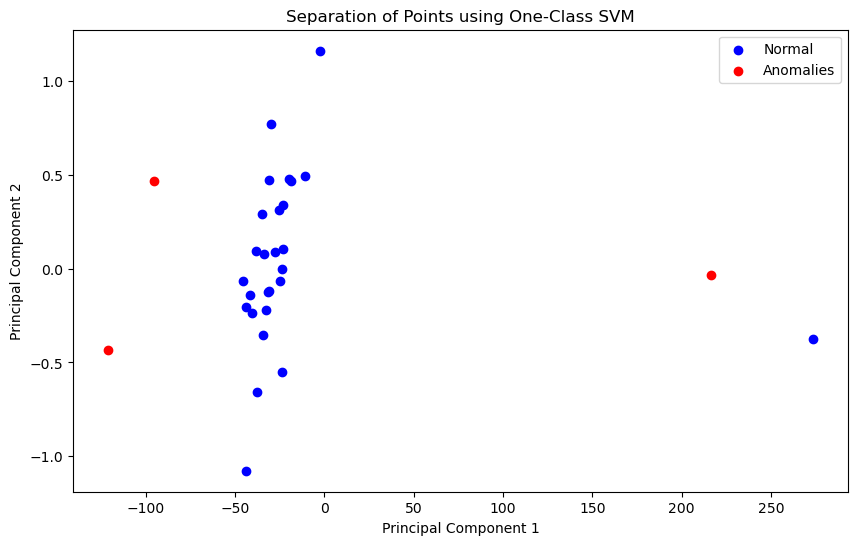

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(normal[:, 0], normal[:, 1], c='blue', label='Normal')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='red', label='Anomalies')
plt.title('Separation of Points using One-Class SVM')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Isolation Forest

In [14]:
from sklearn.ensemble import IsolationForest

# Convert features to numpy array
X = features_df.values

# Train the Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X)

# Predict the anomalies
y_pred = iso_forest.predict(X)

# Anomalies are labeled as -1 and normal data as 1
anomalies = features_df[y_pred == -1]

# Print anomalous time series indices
print("Anomalous time series indices:")
anomalous_indices = np.where(y_pred == -1)[0]
print(anomalous_indices)


Anomalous time series indices:
[ 9 10 11]


In [15]:
# Map the anomalies back to the original time series
anomalous_series = set(anomalous_indices // 3)  # No need to add 1 if series are 0-indexed
print("Anomalous time series:", anomalous_series)


Anomalous time series: {3}


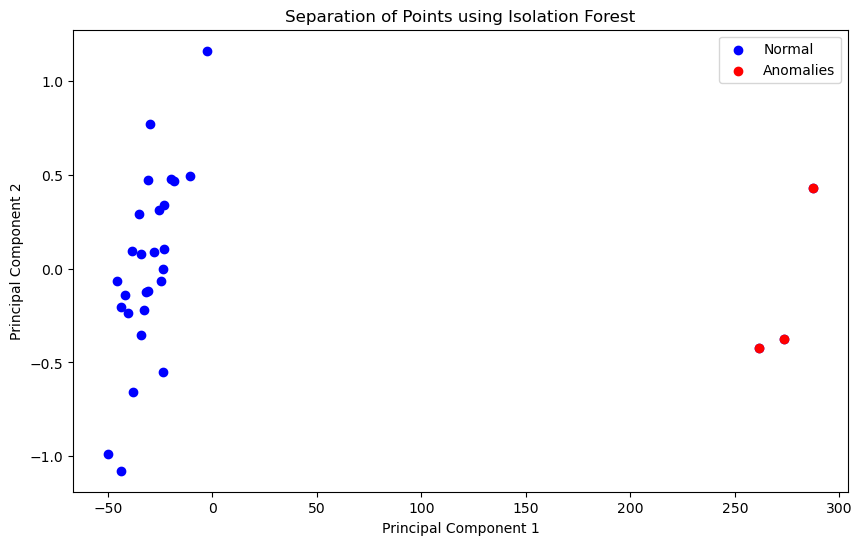

In [16]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Normal')
plt.scatter(X_pca[y_pred == -1, 0], X_pca[y_pred == -1, 1], c='red', label='Anomalies')
plt.title('Separation of Points using Isolation Forest')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# IOF Local Outlier Factor

In [17]:
from sklearn.neighbors import LocalOutlierFactor

#Convert features to numpy array
X = features_df.values

# Train the LOF model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)

# Anomalies are labeled as -1 and normal data as 1
anomalies = features_df[y_pred == -1]

# Print anomalous time series indices
print("Anomalous time series indices:")
anomalous_indices = np.where(y_pred == -1)[0]
print(anomalous_indices)

Anomalous time series indices:
[ 9 10 11]


In [18]:
# Map the anomalies back to the original time series
anomalous_series = set(anomalous_indices // 3)  # No need to add 1 if series are 0-indexed
print("Anomalous time series:", anomalous_series)


Anomalous time series: {3}


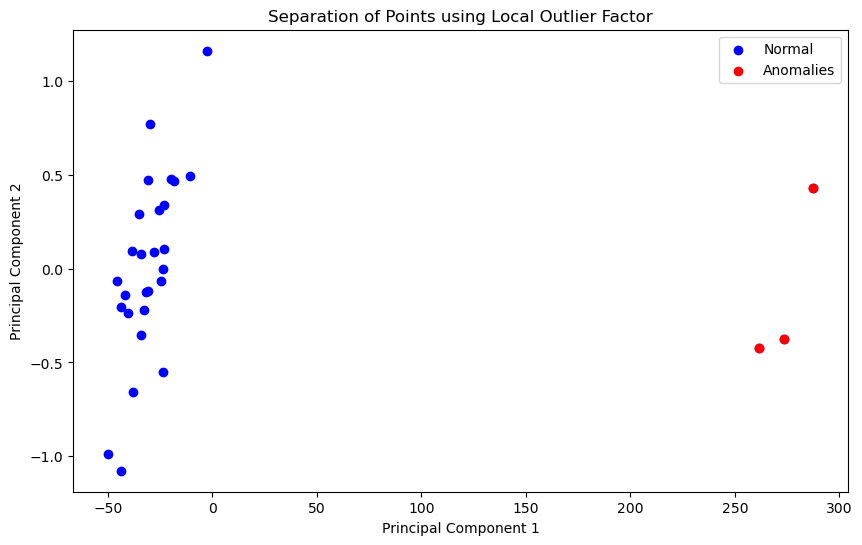

In [19]:
ca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', label='Normal')
plt.scatter(X_pca[y_pred == -1, 0], X_pca[y_pred == -1, 1], c='red', label='Anomalies')
plt.title('Separation of Points using Local Outlier Factor')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# LSTM RNN Autoencoder

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Generate multivariate time series data (10 series, each with 100 time points and 3 variables A, B, and C)
time_points = 100
num_series = 10
num_features = 3
time_series_data = np.random.randn(time_points, num_series, num_features)

# Introduce a sudden deviation in one of the time series
anomalous_series_index = 2
anomalous_point = 70
time_series_data[anomalous_point:, anomalous_series_index, :] += 10


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

# Define LSTM autoencoder model
def create_lstm_autoencoder(timesteps, n_features):
    inputs = Input(shape=(timesteps, n_features))
    encoded = LSTM(64, activation='relu')(inputs)
    encoded = RepeatVector(timesteps)(encoded)
    decoded = LSTM(64, activation='relu', return_sequences=True)(encoded)
    decoded = TimeDistributed(Dense(n_features))(decoded)
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

# Prepare data for LSTM autoencoder (reshape to 3D for LSTM)
X = np.swapaxes(time_series_data, 0, 1)  # Shape: (num_series, timesteps, n_features)

# Create and train the model
timesteps = X.shape[1]
n_features = X.shape[2]
autoencoder = create_lstm_autoencoder(timesteps, n_features)
autoencoder.summary()

# Train the model
autoencoder.fit(X, X, epochs=50, batch_size=1, validation_split=0.2, verbose=1)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 100, 3)         │           195 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,627 (197.76 KB)

 Trainable params: 50,627 (197.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - loss: 1.6976 - val_loss: 0.9280
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6725 - val_loss: 0.9250
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 20.5090 - val_loss: 0.9247
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 788.5079 - val_loss: 0.9248
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.7293 - val_loss: 0.9248
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.6240 - val_loss: 0.9246
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.9688 - val_loss: 0.9244
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.8496 - val_loss: 0.9241
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.0168 - val_loss: 0.9240
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0627 - val_loss: 0.9240
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4918 - val_loss: 0.9238
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 8.5148 - val_loss: 0.92

In [22]:
# Compute reconstruction error
reconstructions = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructions, 2), axis=(1, 2))
print(f"Reconstruction Errors: {mse}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
Reconstruction Errors: [0.84122607 0.97167828 7.71470735 0.92690296 1.02312451 0.82295701
 1.02430393 0.85499763 0.91982993 0.93939342]


Anomalous time series indices: [2]


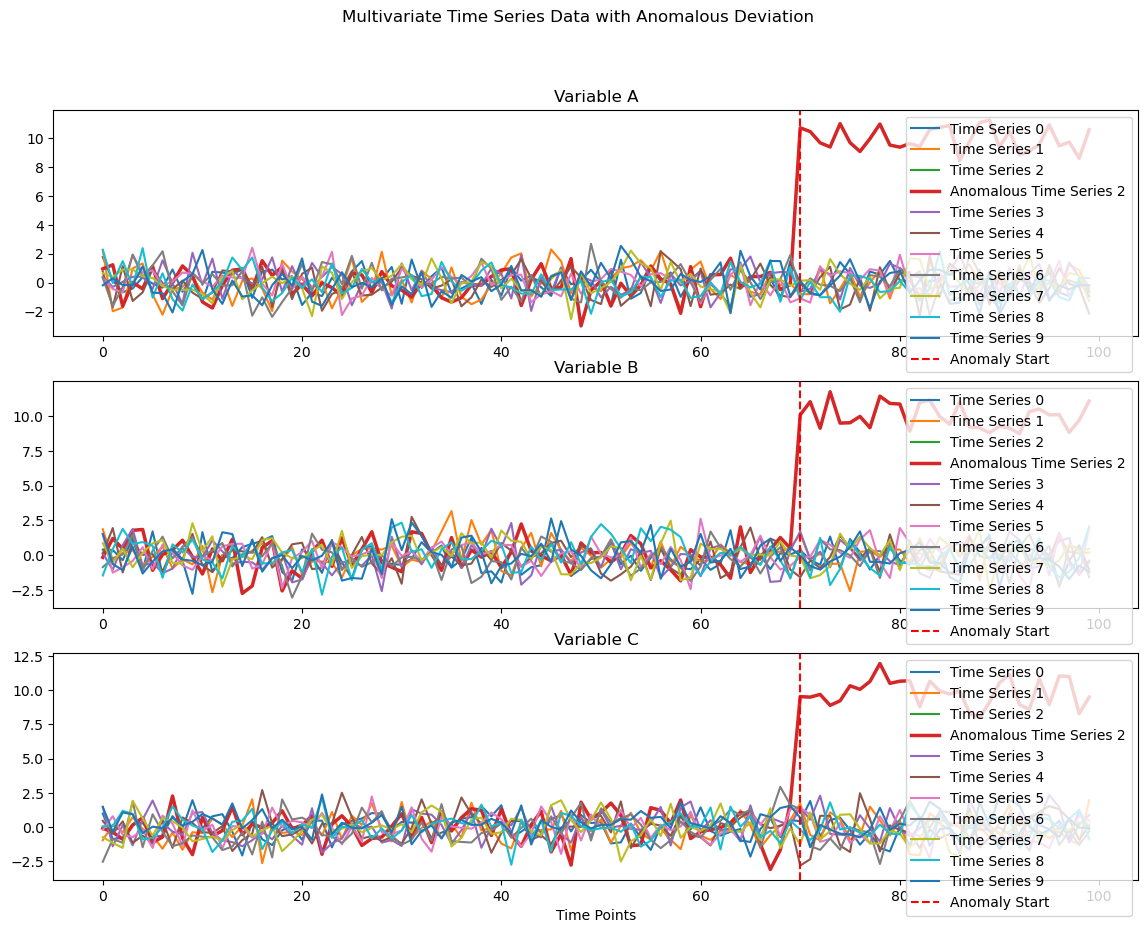

In [23]:
# Determine threshold for anomaly detection
threshold = np.percentile(mse, 90)
anomalous_series = np.where(mse > threshold)[0]
print(f"Anomalous time series indices: {anomalous_series}")

# Plot the time series data with reconstruction error
fig, axs = plt.subplots(n_features, 1, figsize=(14, 10))
labels = ['A', 'B', 'C']

for j in range(n_features):
    for i in range(num_series):
        axs[j].plot(time_series_data[:, i, j], label=f'Time Series {i}')
        if i in anomalous_series:
            axs[j].plot(time_series_data[:, i, j], label=f'Anomalous Time Series {i}', linewidth=2.5)
    axs[j].axvline(x=anomalous_point, color='red', linestyle='--', label='Anomaly Start')
    axs[j].set_title(f'Variable {labels[j]}')
    axs[j].legend()

plt.suptitle('Multivariate Time Series Data with Anomalous Deviation')
plt.xlabel('Time Points')
plt.show()
